<a href="https://colab.research.google.com/github/hpbowala/Language-Modelling-1-/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
words = open('names.txt','r').read().splitlines()

In [39]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [40]:
# printing tuples of letters that follow one after other 
for w in words[:1]:
  # adding special characters for start and end
  chs = ['<S>'] + list(w) + ['<E>'] 
  for ch1, ch2 in zip(chs, chs[1:]):
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [41]:
# maintaining a map of the bigrams with count to know which are more likely to happen
b = {}

# printing tuples of letters that follow one after other 
for w in words:
  # adding special characters for start and end
  chs = ['<S>'] + list(w) + ['<E>'] 
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    # if the bigram does not exist already, by default return occurance count as 0
    b[bigram] = b.get(bigram,0) + 1 
    # print(ch1, ch2)


In [42]:
# custom sorting function that sorts in the desc order of the number of occurances of bigram (if k = (('a','b'),5)), k[1] = 5) 
sorted(b.items(), key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [43]:
import torch 

In [44]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [45]:
# 28 * 28 matrix to store occurances 26 alphabetical chars plus end and start chars 
N = torch.zeros((28,28), dtype=torch.int32)


In [46]:
# creating lookup table for each character 
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [47]:
# maintaining a map of the bigrams with count to know which are more likely to happen

# printing tuples of letters that follow one after other 
for w in words:
  # adding special characters for start and end
  chs = ['<S>'] + list(w) + ['<E>'] 
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1] #lookup the index of character from lookup table 
    ix2 = stoi[ch2]
    # increment the count value at ix1,ix2 in N matrix
    N[ix1,ix2] += 1


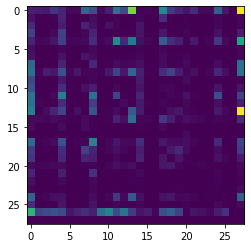

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(N)